In [2]:
import scvelo as scv
scv.settings.set_figure_params('scvelo')
import numpy as np
import scanpy as sc
import pandas as pd
import scvelo as scv
import os
import pandas as pd
import matplotlib.pyplot as plt
import cellrank as cr

In [72]:
adata=sc.read("/media/ggj/Guo-4T-AB3/UU/OB/brain/RNAvelocity/10X_brain_RNAvelocity.h5ad")

In [73]:
adata.uns['celltype_colors']=["#A6CEE3", "#7EB4D5", "#579BC7", "#2F82B9", "#3789AD", "#62A7A0", "#8DC594", "#ACDC86", "#87CA6A",
"#62B74F", "#3DA533", "#5C9E42", "#979C62", "#D19B82", "#F98F8E", "#F2696A", "#EB4445", "#E31F21",
"#E94330", "#F17348", "#F8A361", "#FDB661", "#FDA440", "#FE9120", "#FF7F00"]

In [74]:
scv.pp.filter_and_normalize(adata, min_shared_cells=20, log=True)

Filtered out 1044 genes that are detected in less than 20 cells (shared).
Normalized count data: spliced, unspliced.


In [75]:
adata

AnnData object with n_obs × n_vars = 7374 × 849
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'cellID', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'celltype_colors'
    obsm: 'X_pca', 'X_tSNE', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances'

In [76]:
adata.var_names

Index(['Xkr4', 'Rgs20', 'Oprk1', 'St18', 'Prex2', 'A830018L16Rik', 'Sulf1',
       'Kcnb2', 'Crispld1', 'Rims1',
       ...
       'Htr2c', 'Ptchd1', 'Gm15155', 'Phex', 'Nhs', 'Glra2', 'Tmsb4x',
       'Frmpd4', 'Arhgap6', 'Gm15261'],
      dtype='object', length=849)

In [77]:
## subset genes
#genes = pd.read_csv("/media/ggj/ggjlab2/hezuo/mjq/发表文章整理/alldata/seurat_process_0729/final.gene.de.common1500.specific0.tb",sep="\t", header=0, index_col=0)
#select_genes = list(set(genes.index) & set(adata.var_names))
#
#adata.raw = adata
#adata = adata[:,select_genes]

In [78]:
adata

AnnData object with n_obs × n_vars = 7374 × 849
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'cellID', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'celltype_colors'
    obsm: 'X_pca', 'X_tSNE', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances'

In [79]:
scv.pp.neighbors(adata)

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [80]:
scv.pp.moments(adata, n_pcs=20, n_neighbors=20)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [81]:
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)


  0%|          | 0/7374 [00:00<?, ?cells/s]

/home/ggj/anaconda3/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [14]:
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata, basis="umap")

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)


  0%|          | 0/7374 [00:00<?, ?cells/s]

/home/ggj/anaconda3/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [15]:
adata

AnnData object with n_obs × n_vars = 7374 × 849
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'cellID', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_tSNE', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

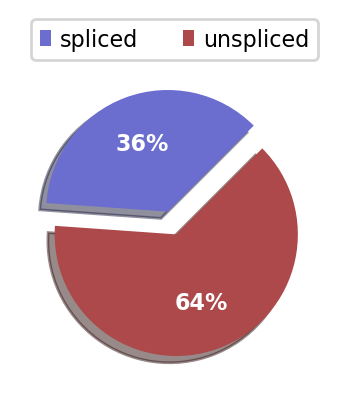

In [52]:
scv.pl.proportions(adata)

saving figure to file ./figures/scvelo_velocity_10X.pdf


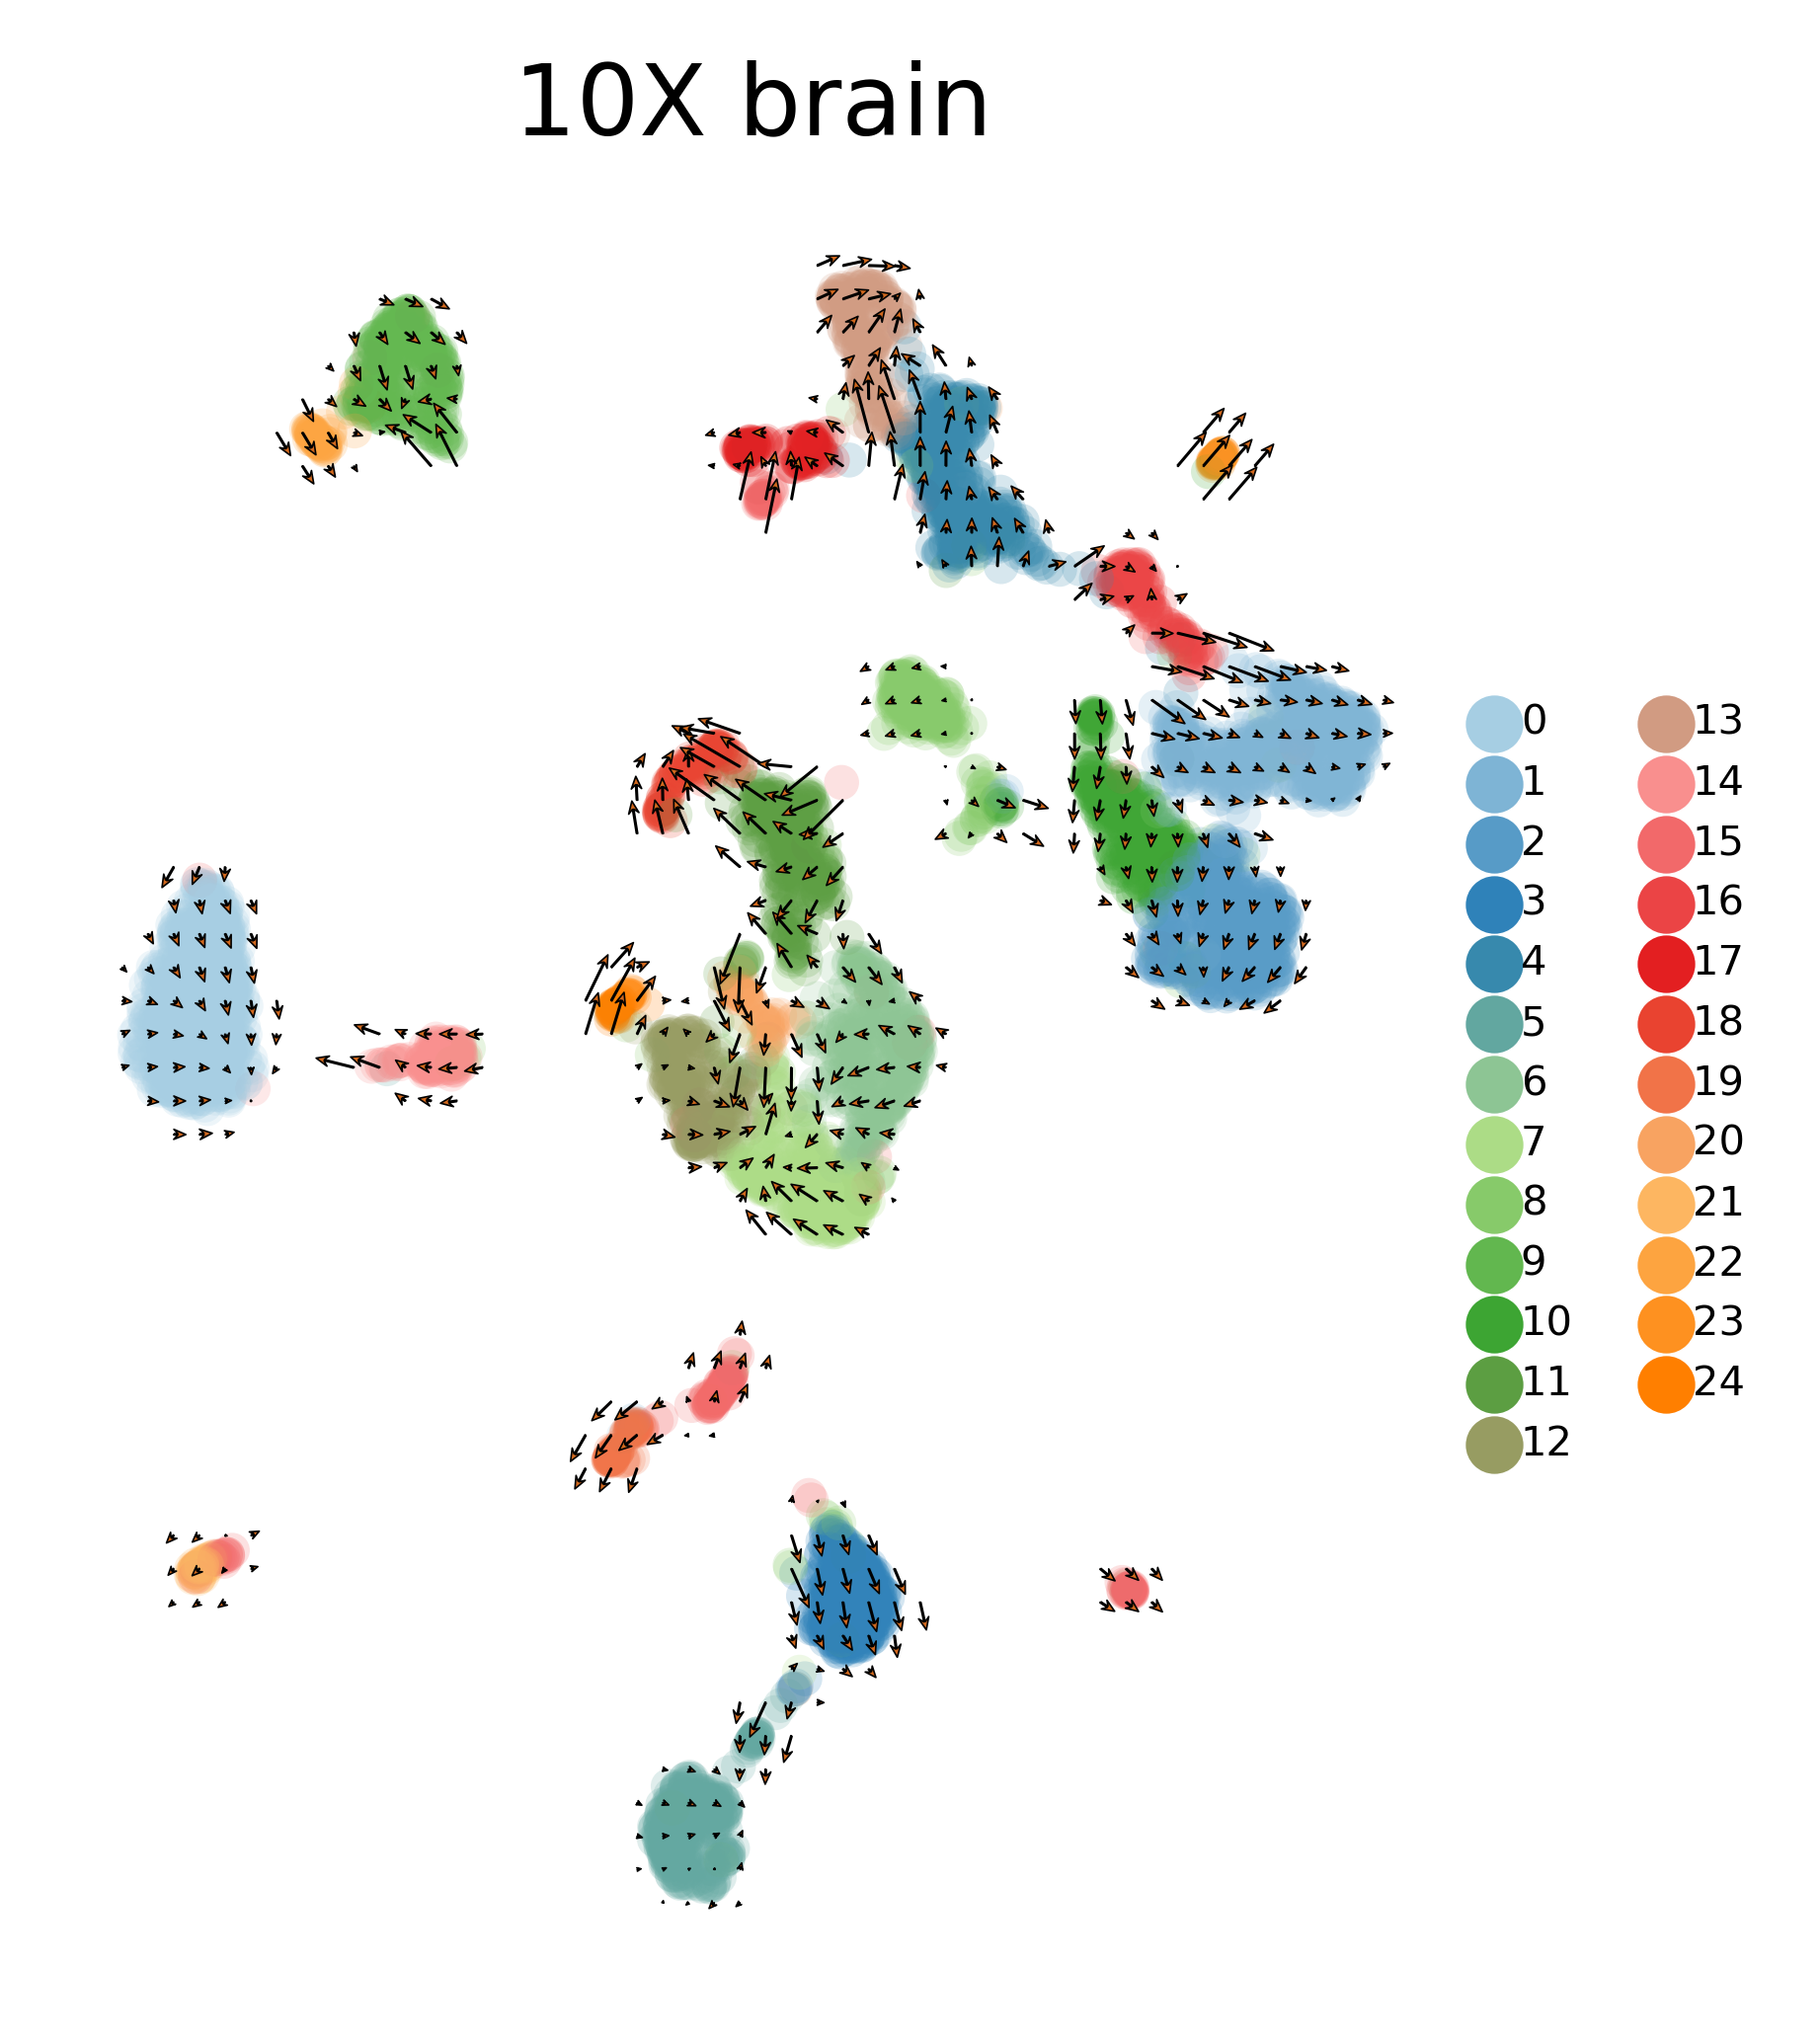

In [36]:
scv.settings.set_figure_params('scvelo', dpi=300, dpi_save=600)
fig, ax = plt.subplots()
ax.set_aspect(1)
scv.pl.velocity_embedding_grid(adata, basis='umap',color='celltype', title='10X_brain',
                               arrow_size=1.5, arrow_length=2, arrow_color="#D2691E",
                               alpha=0.2,
                               density=1,
                               legend_loc='right margin',legend_fontsize=5,
                               show=True,
                               save="velocity_10X.pdf",
                               figsize=(20,10),
                               ax=ax)

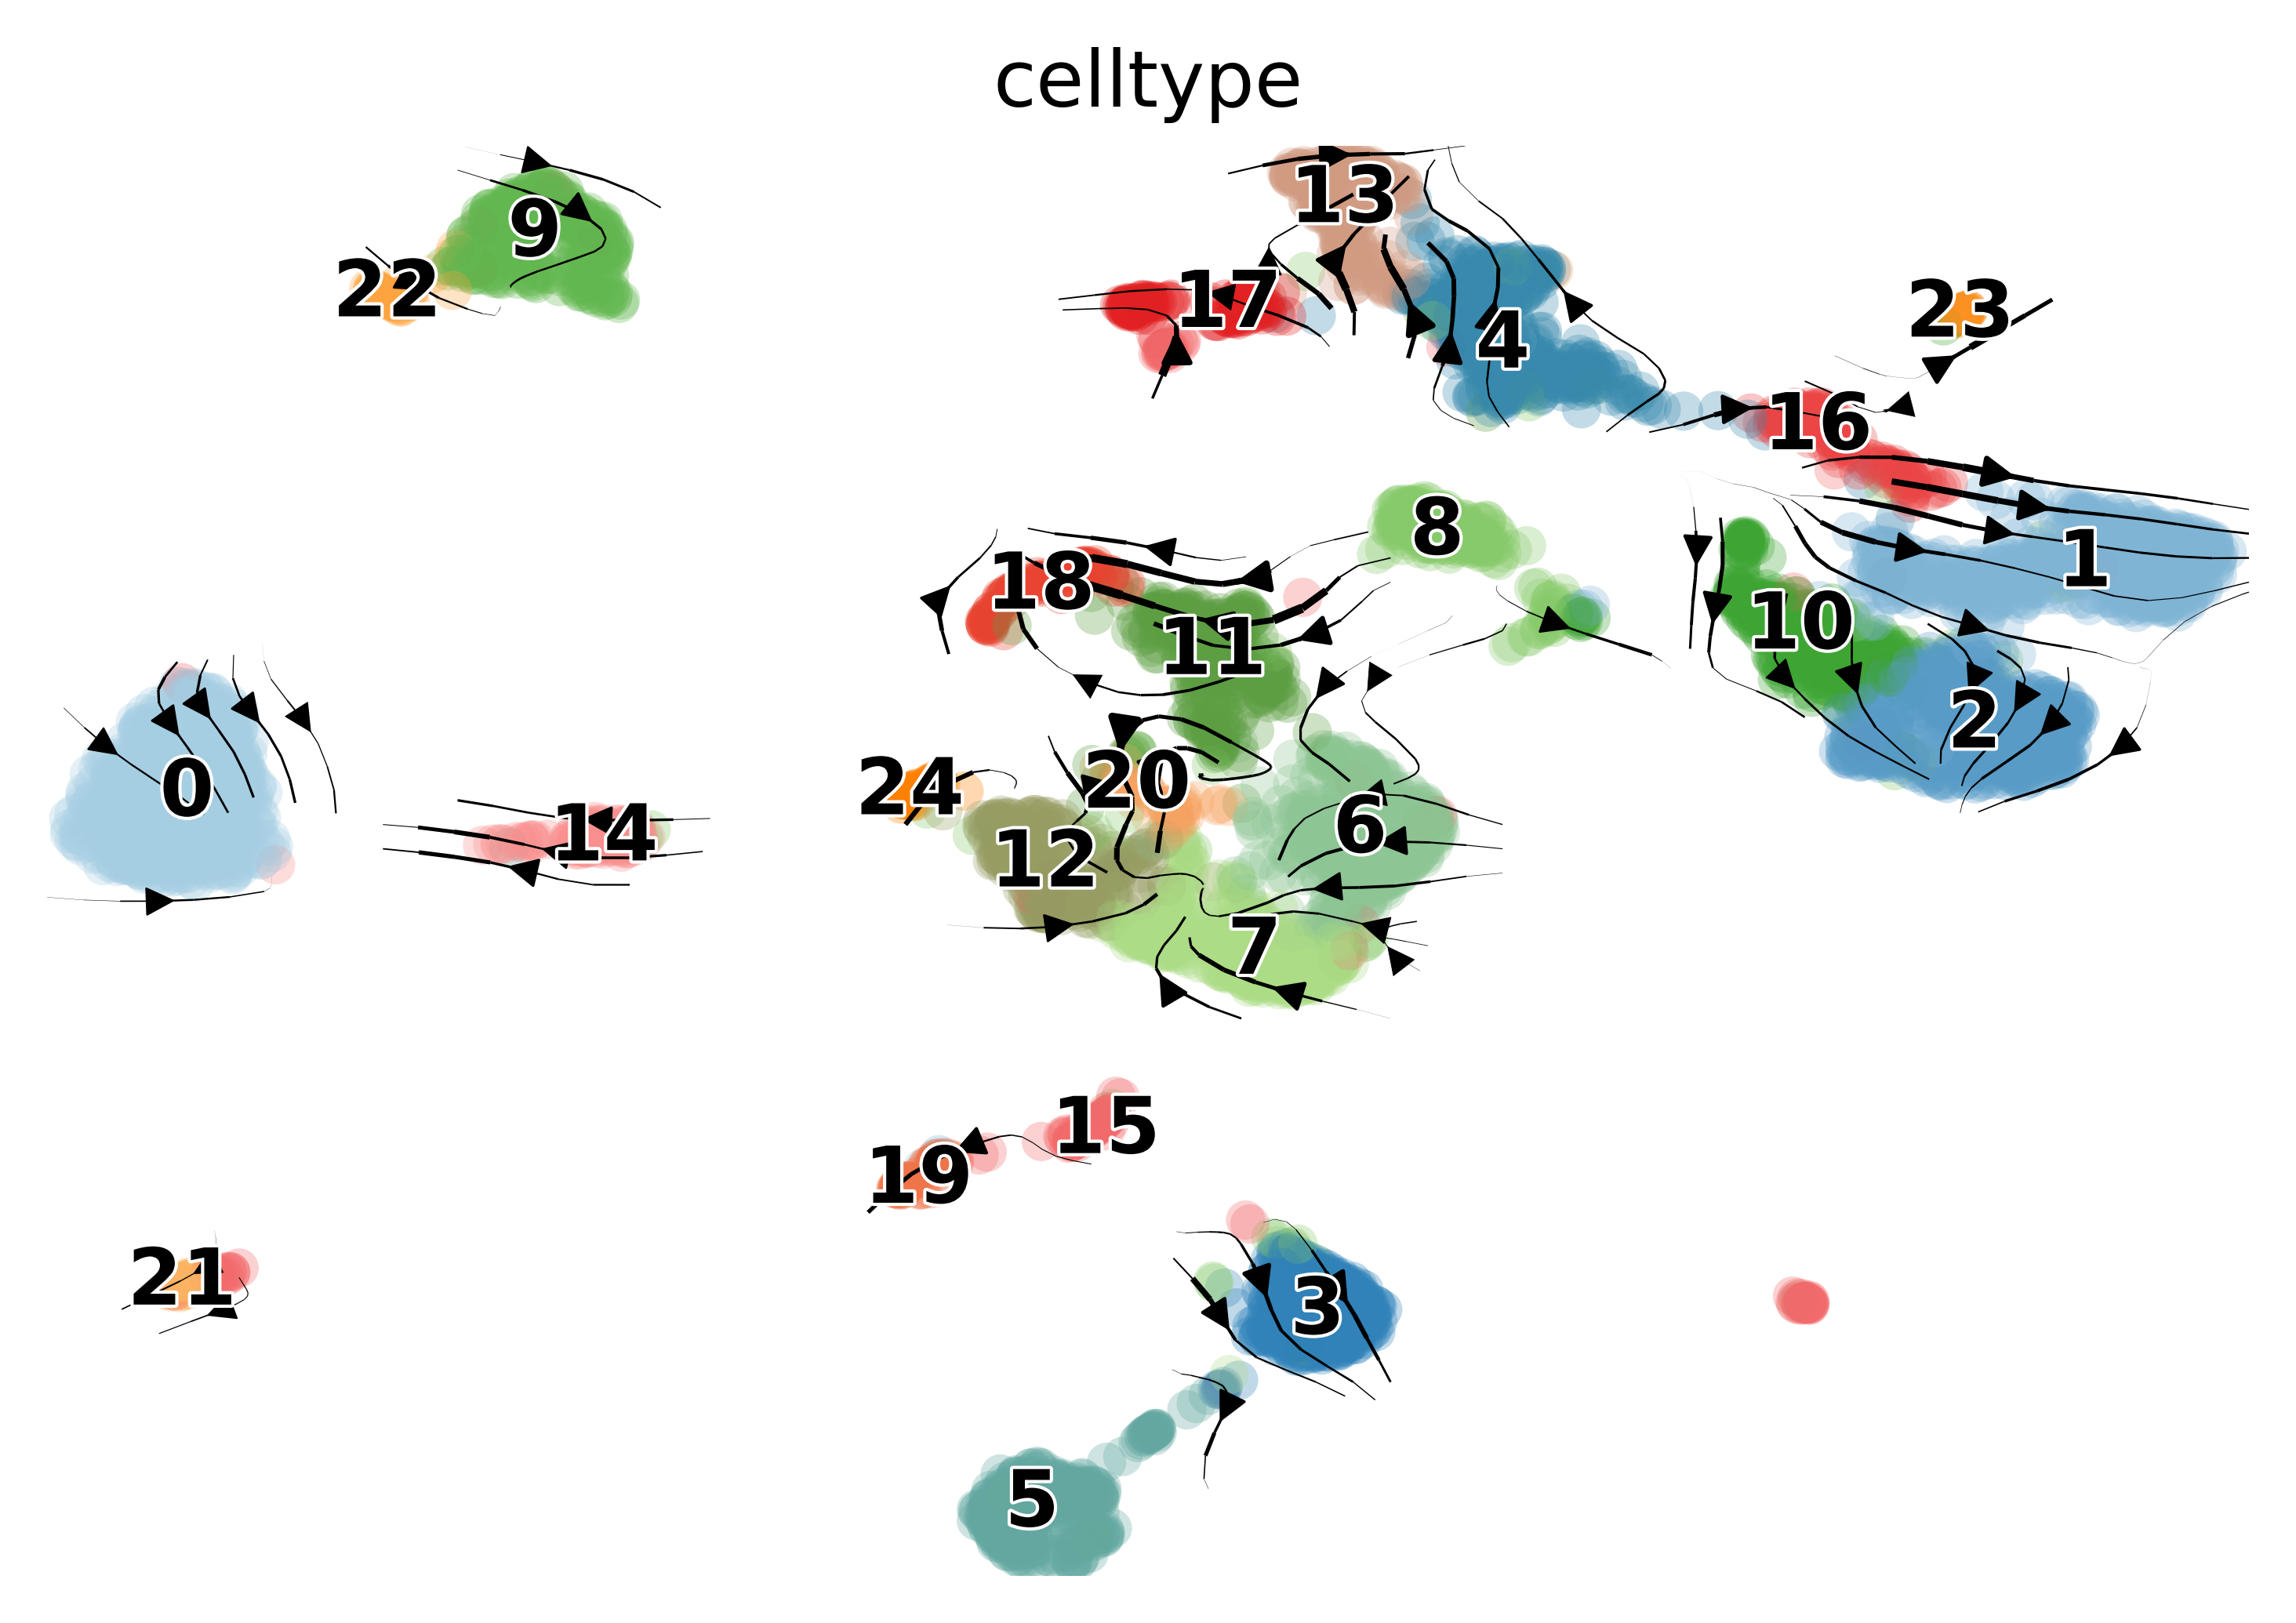

In [20]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color='celltype')

In [23]:
adata.write("/media/ggj/Guo-4T-AB3/UU/OB/brain/RNAvelocity/10X_brain_RNAvelocity_result.h5ad", compression='gzip')

In [24]:
scv.tl.velocity_confidence(adata)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


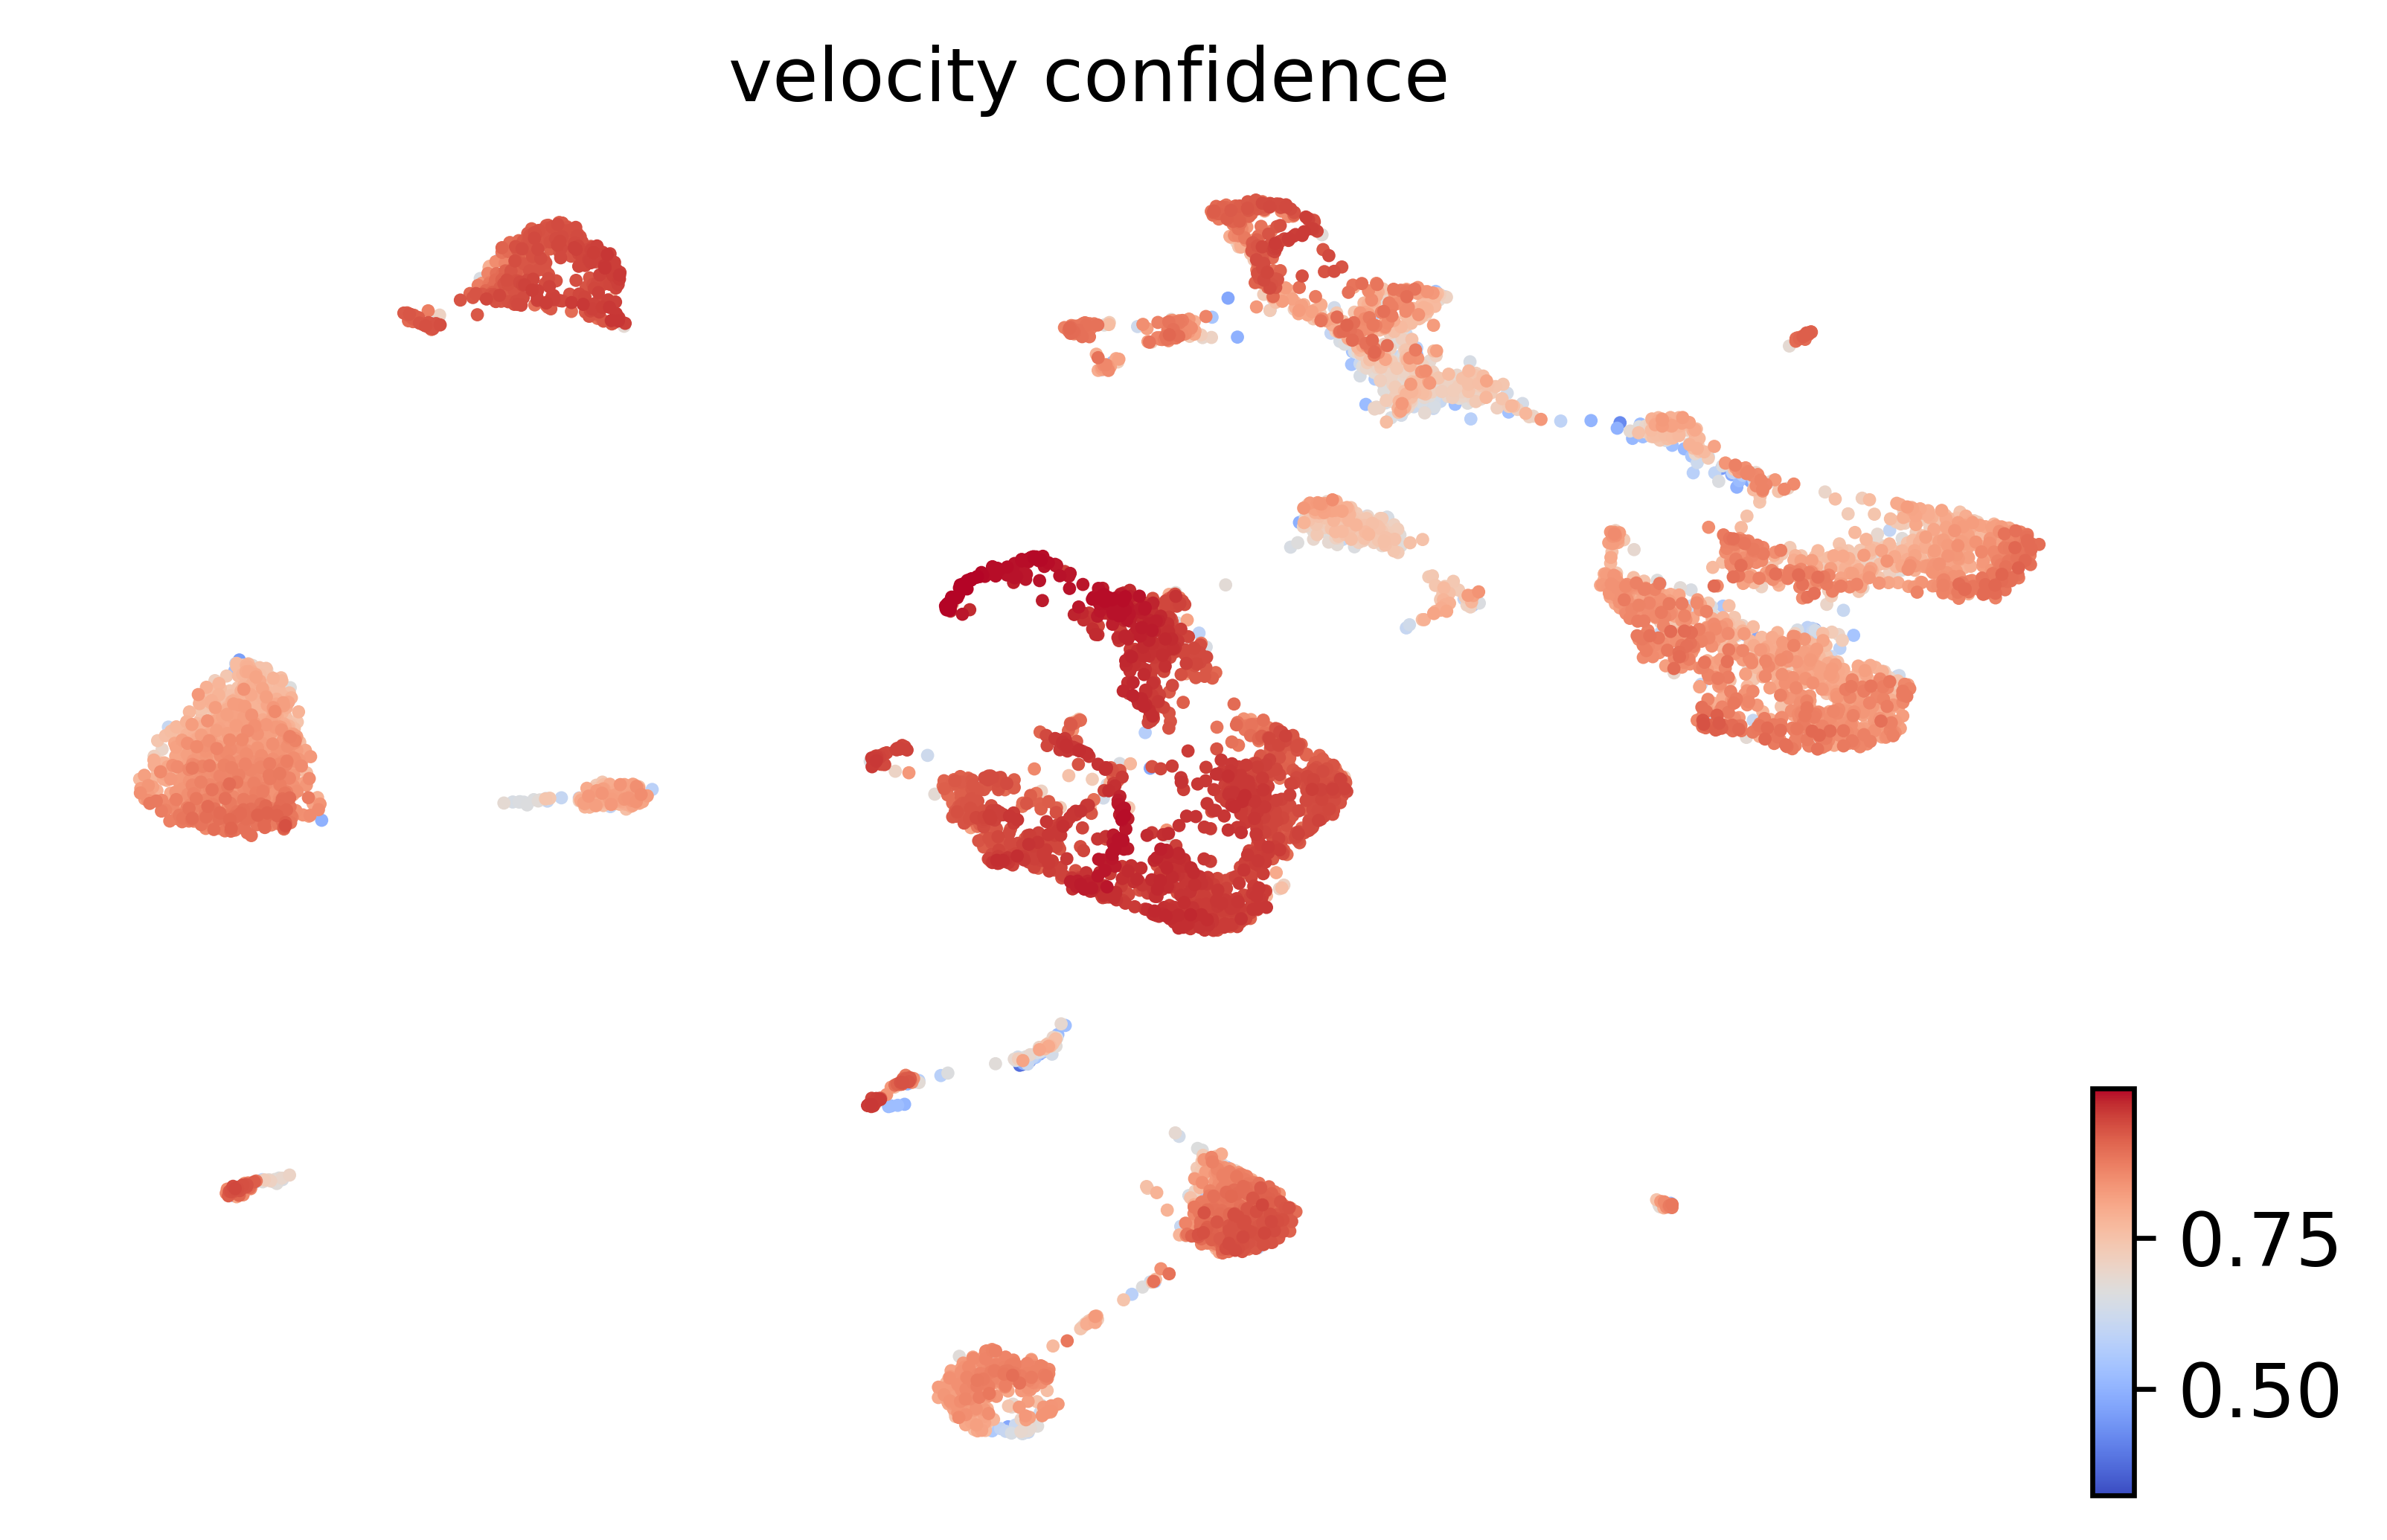

In [26]:
scv.pl.scatter(adata,c='velocity_confidence',cmap='coolwarm')

In [31]:
adata.obs.to_csv("../../RNAvelocity/10X_RNAvelocity_anno.csv")

In [40]:
adata.var.to_csv("../../RNAvelocity/10X_RNAvelocity_gene_anno.csv")

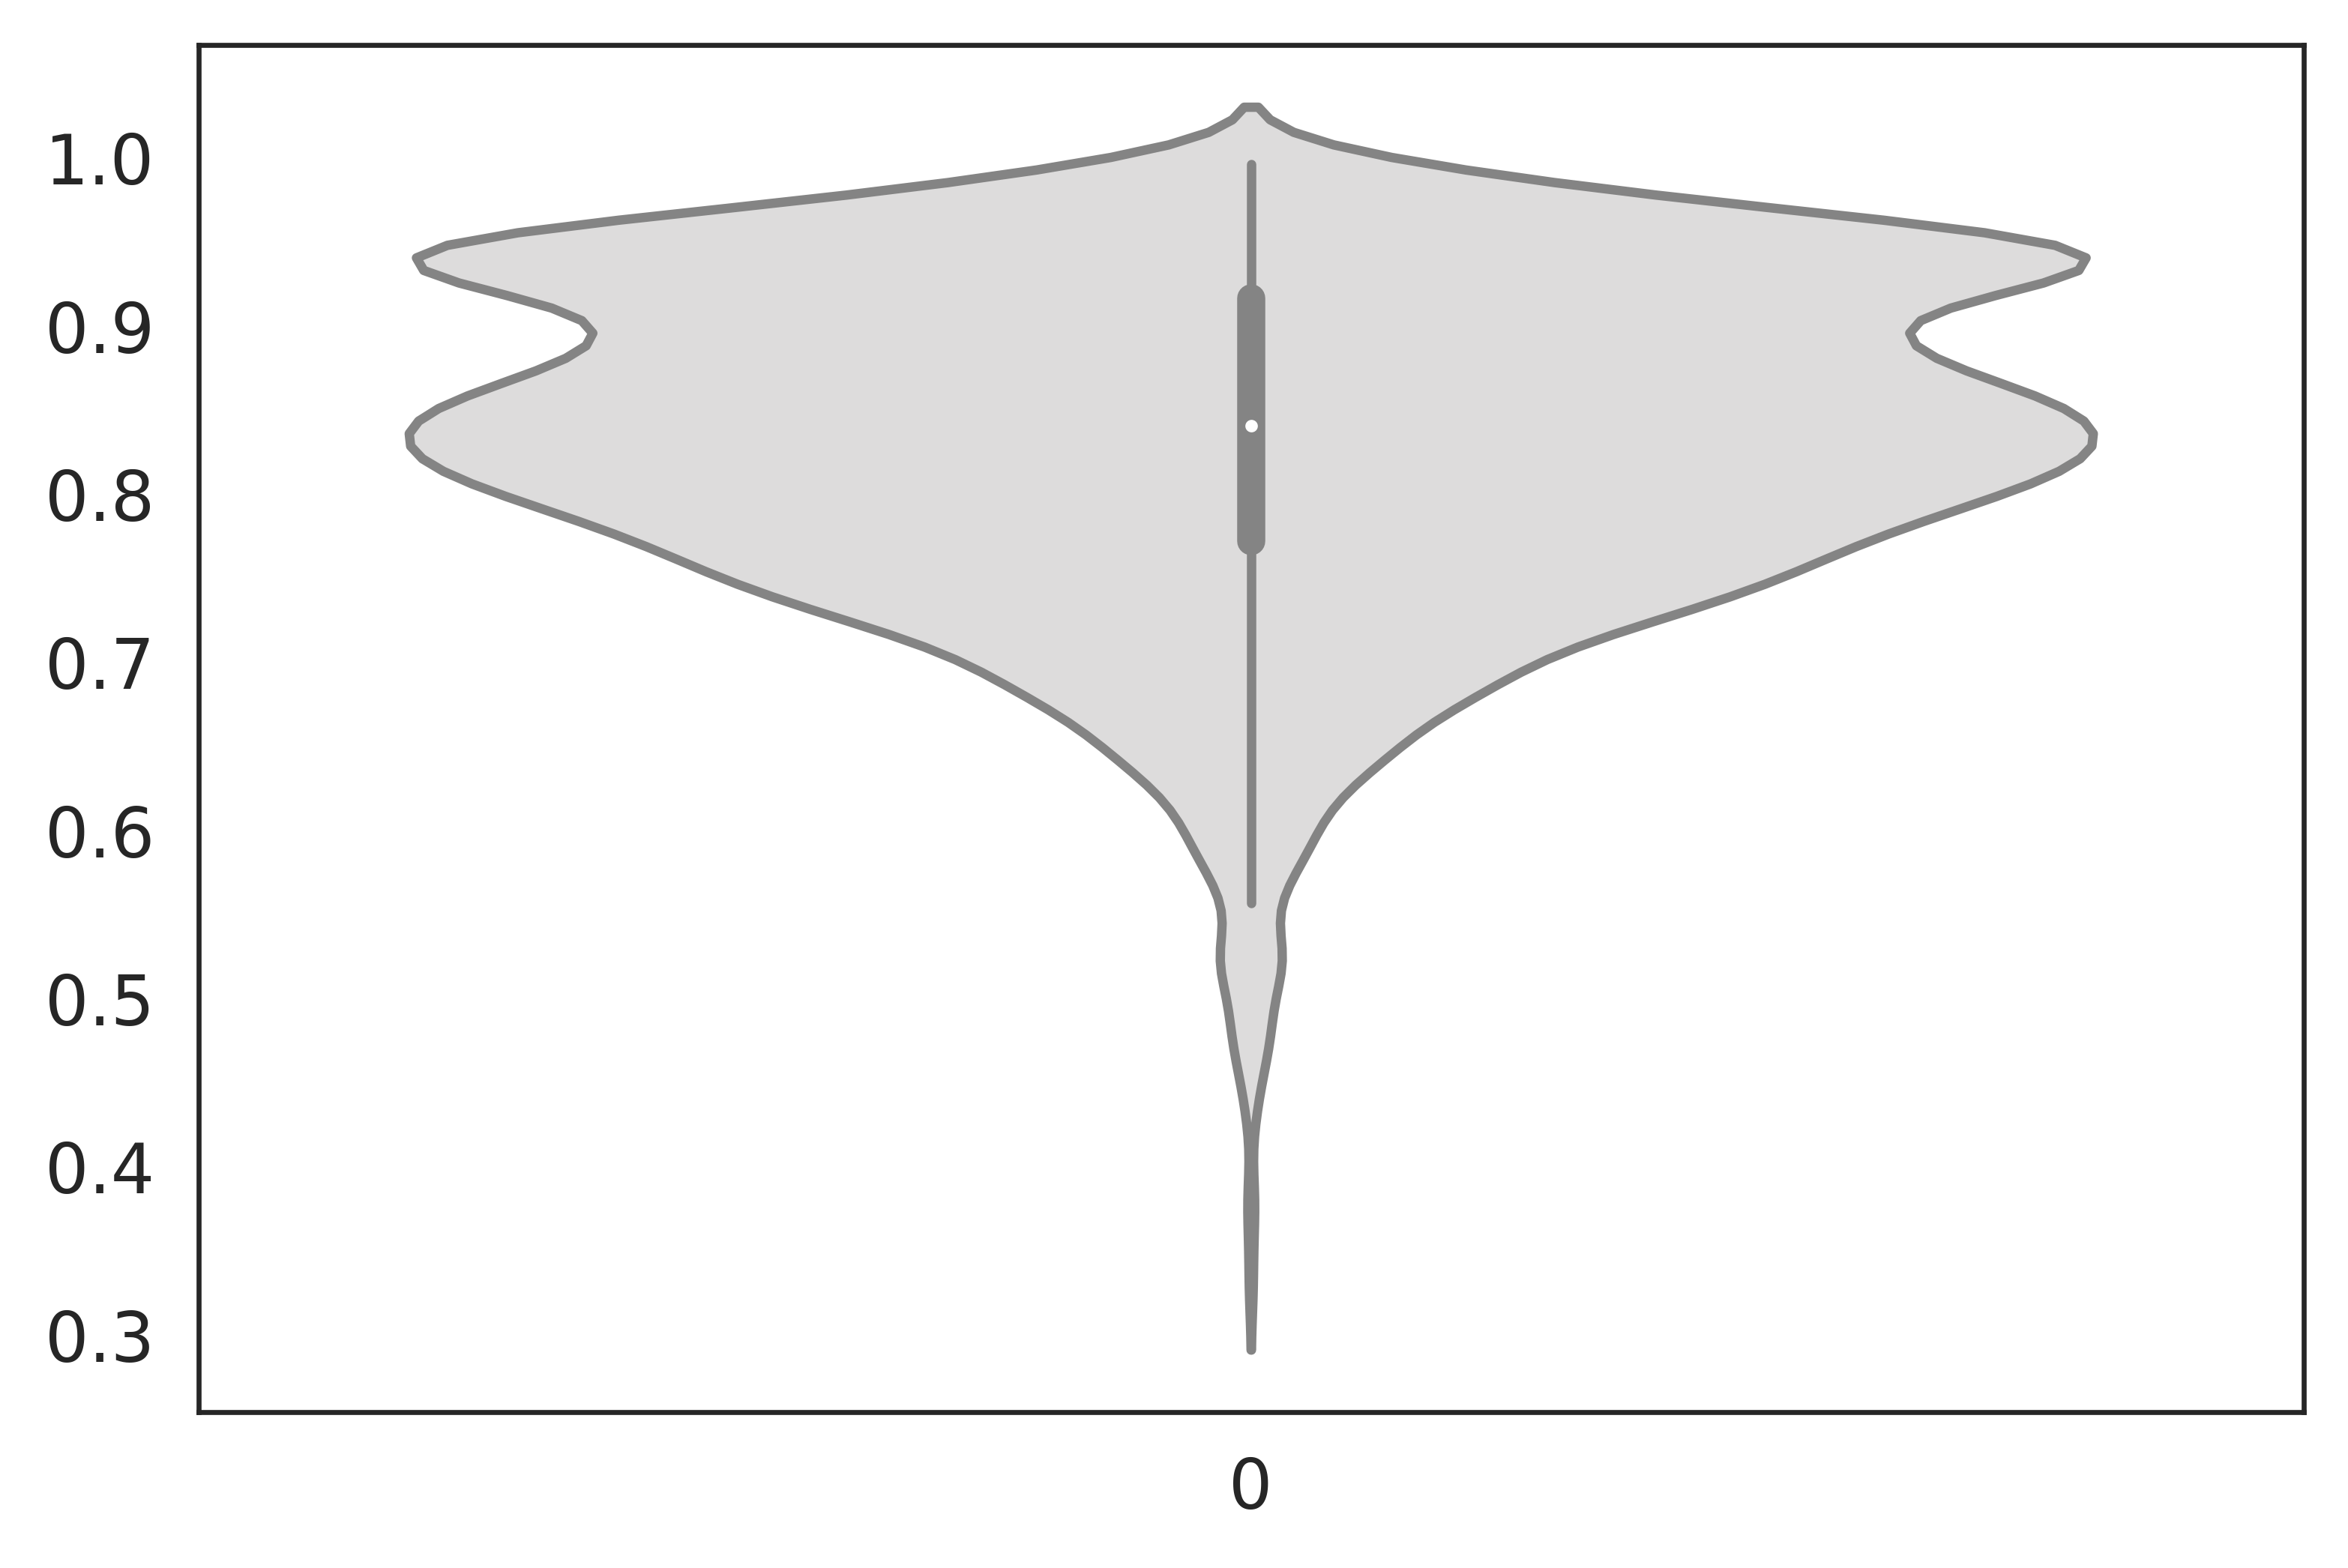

In [71]:
velocity_confidence=adata.obs['velocity_confidence']
import seaborn as sns
sns.set_style('white')
sns.violinplot(data=velocity_confidence,palette="coolwarm")
plt.savefig("./figures/10X_velocity_confidence.png")

In [53]:
scv.tl.rank_velocity_genes(adata, groupby='celltype', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:04) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0       1       2        3              4        5        6       7  \
0   Prr5l   Caln1   Actn2   Ptprz1        Zfp804b    Ikzf1     Rgs6   Car10   
1  Rnf220    Gng7  Spock3    Npas3  C530008M17Rik     Fli1  Rasgrf2   Efna5   
2    St18  Kcnab1  Kcnab1     Gli3          Glra3    Maml3   Pdzrn3   Mef2c   
3  Dock10  Spock3  Acvr1c    Rgs20           Ank1    Zfhx3    Car10   Kcnh5   
4    Gab1  Sh3rf2   Pde7b  Pitpnc1         Pcdh15  Epb41l2   Sphkap  Pdzrn3   

               8        9  ...       15             16             17     18  \
0           Sgcz  Tmem178  ...     Sgcz           Pbx3         Kcnip1  Ptprd   
1         Prdm16    Pde1a  ...    Cntn5          Foxp2  C530008M17Rik   Erc2   
2          Kcnj6     Etl4  ...    Kcnc2          Olfm3         Zbtb16  Epha5   
3  A830018L16Rik   Pou6f2  ...   Sorcs3  6530403H02Rik         Kcnmb2   Grm8   
4          Cntn5    Grik3  ...  Col19a1        Gm13974        Cntnap2  Cpne4   

      19       20       21     22       23      24  
0  Rbms1  Khdrbs2    Foxp2  Adcy2     Htr4   Olfm3  
1  Cped1   Lrrtm4    Gulp1    Tox  Tcerg1l  Pcdh15  
2  Lama2    Pex5l   Prkag2  Vwc2l    Pde1a   Synpr  
3   Nfia    Dpp10  Col25a1  Trpc3     Nrp2  Cadps2  
4   Svil    Parm1    Cped1  Grik3     Sgcz    Gng2  

[5 rows x 25 columns]

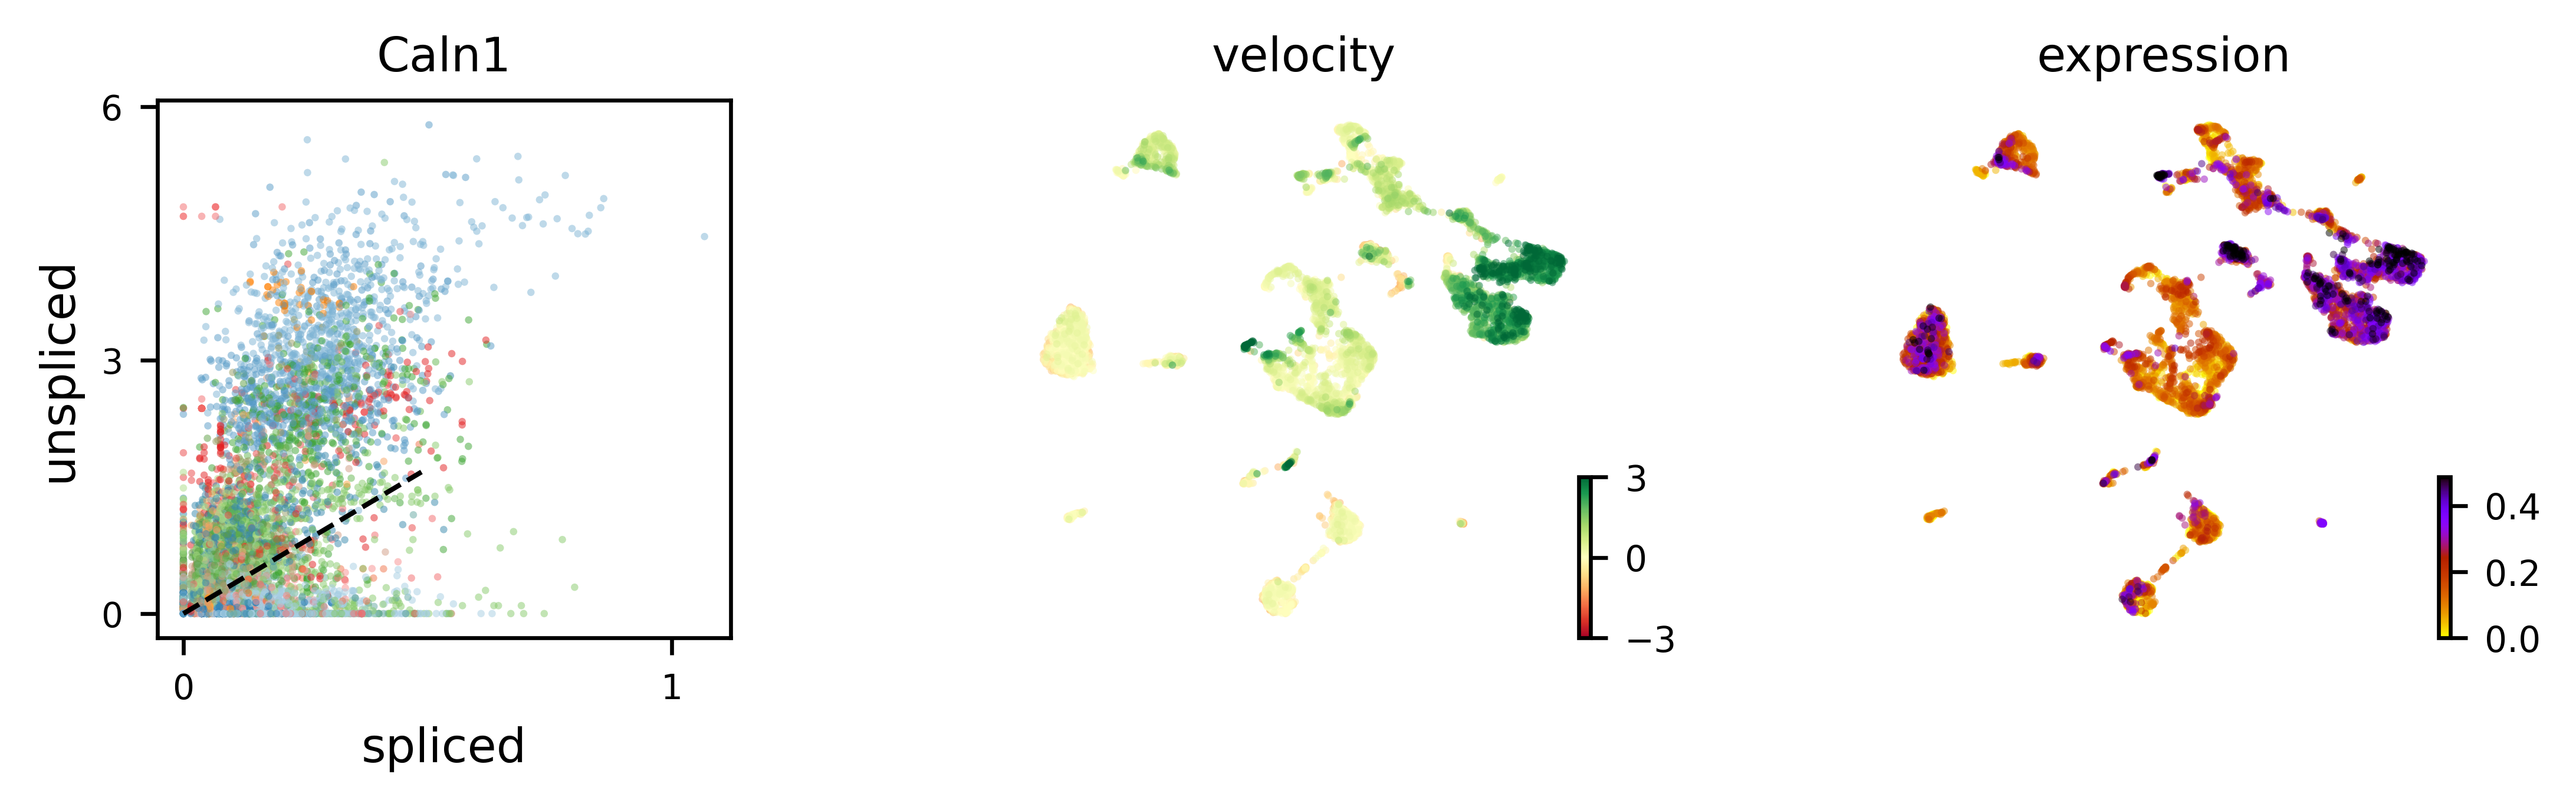

In [54]:
scv.pl.velocity(adata, ['Caln1'],color=['celltype'], ncols=3)

# Dynamical Modeling

In [55]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical', min_r2=None)
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/48 cores)


  0%|          | 0/620 [00:00<?, ?gene/s]

/home/ggj/anaconda3/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/ggj/anaconda3/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:55) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)


  0%|          | 0/7374 [00:00<?, ?cells/s]

/home/ggj/anaconda3/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


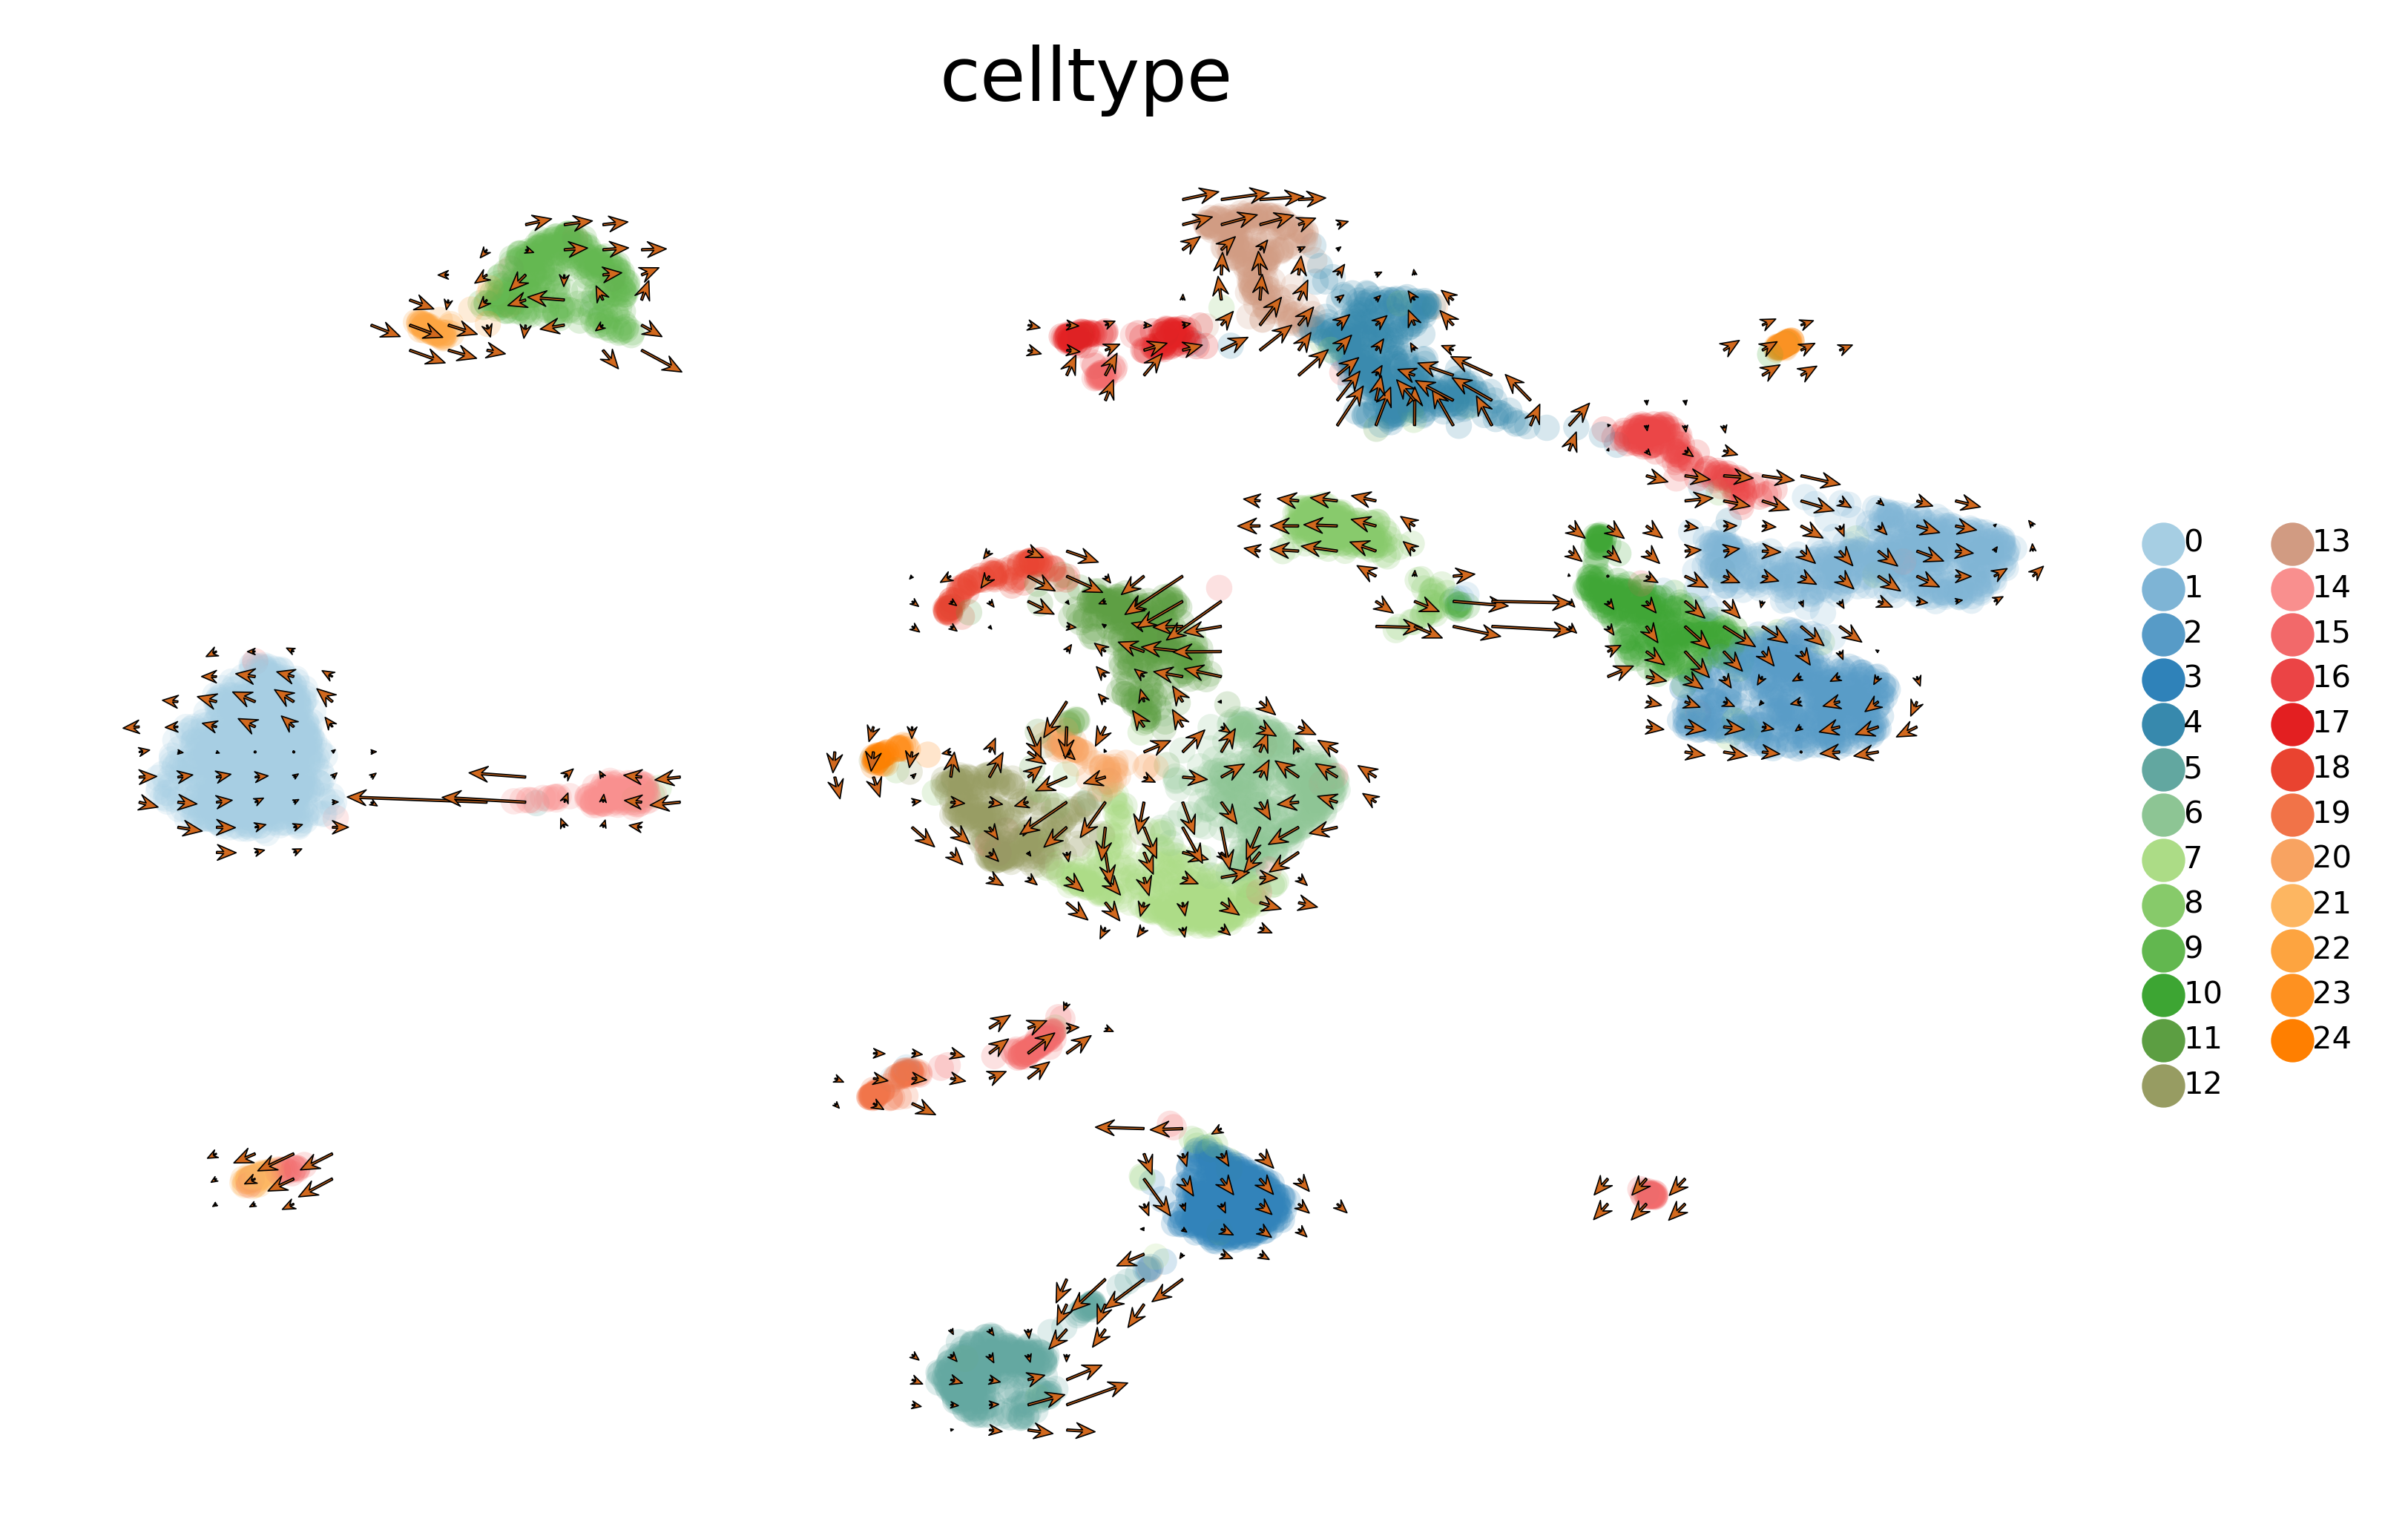

In [58]:
scv.settings.set_figure_params('scvelo', dpi=300)
scv.pl.velocity_embedding_grid(adata, basis='umap',color='celltype',arrow_size=1.5, 
                               arrow_length=2,arrow_color="#D2691E",
                               legend_loc='right margin',legend_fontsize=5)

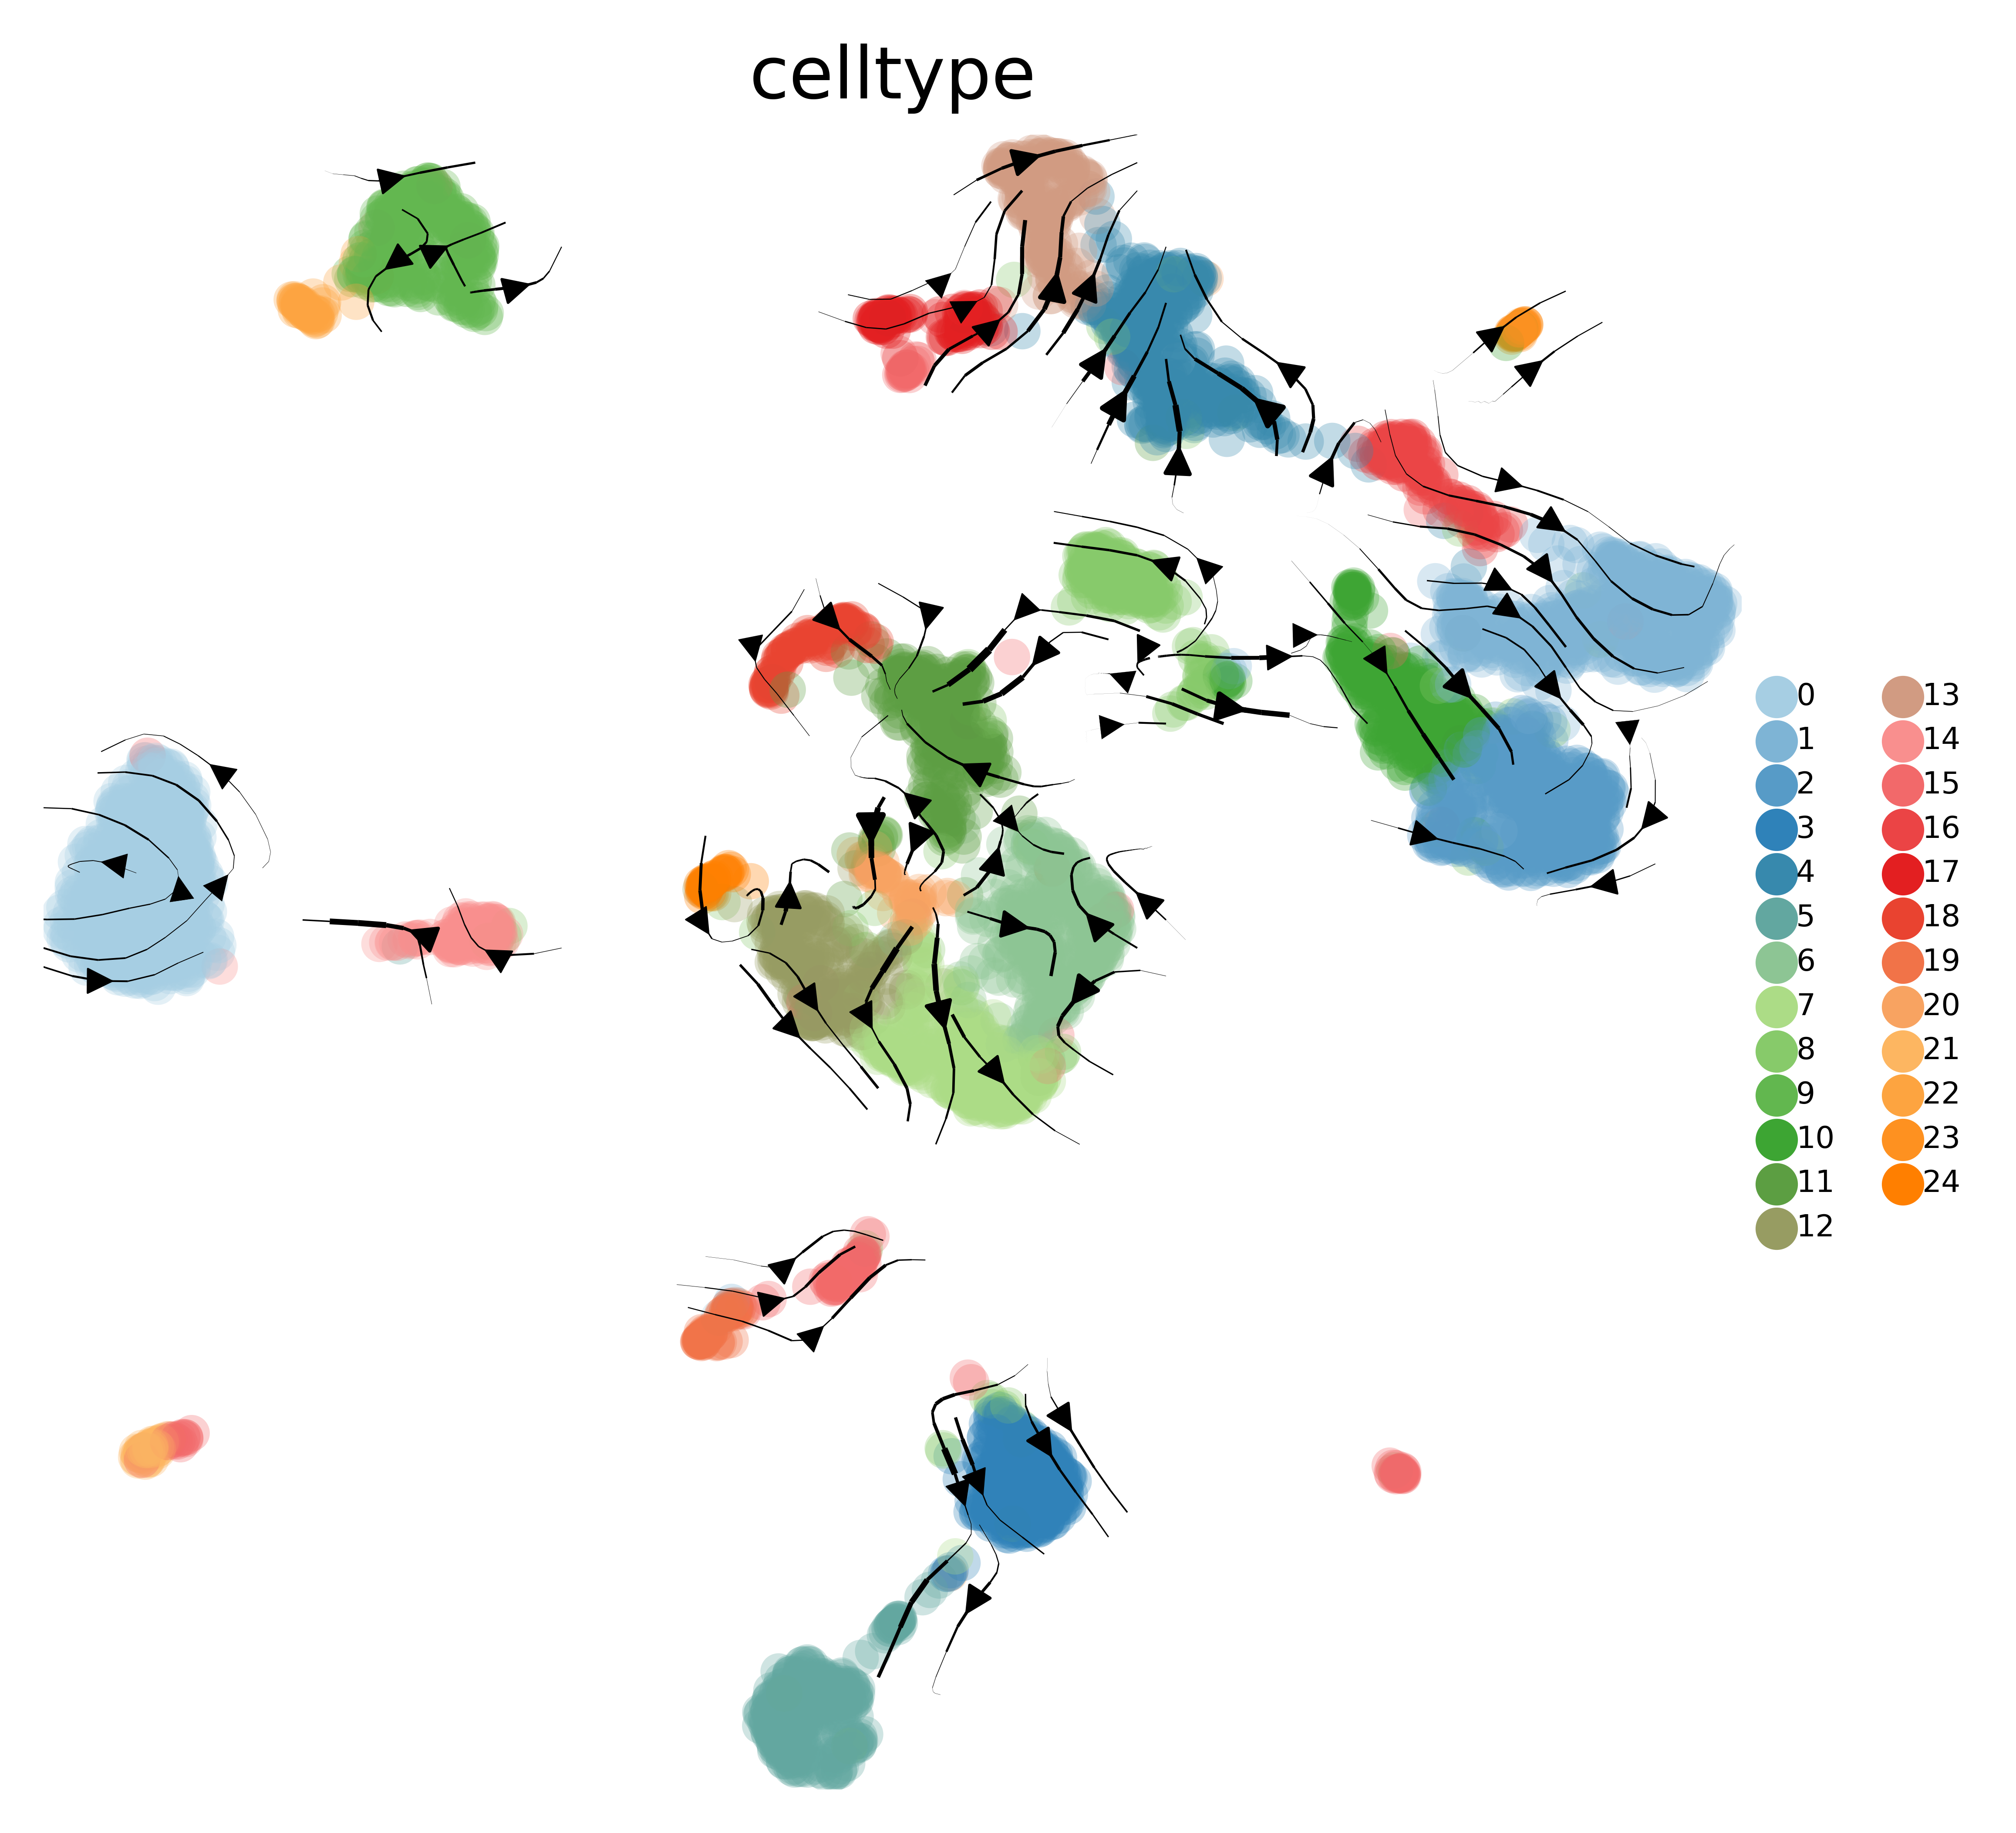

In [57]:
scv.settings.set_figure_params('scvelo', dpi=500)
scv.pl.velocity_embedding_stream(adata, basis='umap',color='celltype',
                                 legend_loc='right margin',legend_fontsize=5, figsize=(5,5))

In [59]:
scv.tl.rank_velocity_genes(adata, groupby='celltype', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:03) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0        1        2       3        4        5        6  \
0           Fa2h     Drd2    Actn2   Phkg1   Thsd7b  Apbb1ip    Cpne9   
1        Plekhh1    Actn2  Gm13974    Dbx2     Rmst   Tgfbr2  Col19a1   
2  A230001M10Rik   Sh3rf2  Gm13269    Aqp4   Pcdh15    Ikzf1  Rapgef5   
3            Mog  Gm13974    Prkch  Bmpr1b  Gm13629  Slco2b1   Sphkap   
4        Sec14l5  Adamts3  Gm28905  Ptprz1     Miat  Unc93b1    Sidt1   

               7       8        9  ...     15       16      17      18  \
0        Gm13629  Prdm16   Thsd7b  ...  Kcnc2  Gm13974    Egfr  Pcdh15   
1  4921539H07Rik   Kcnc2   Mpped1  ...  Srrm4   Thsd7b  Akain1    Dner   
2          Gfra2    Nwd1  Neurod6  ...  Rims1    Dchs2   Prox1   Mef2c   
3          Cpne9    Tox3    Spon1  ...  Tenm1     Rgs9   Kcnc2    Flt3   
4          Pamr1    Sox6    Kcnj6  ...  Epha5    Caln1    Miat   Kcnc2   

       19      20       21      22      23      24  
0   Prex2   Pex5l    Plpp3   Glra2    Rgs9  Pcdh15  
1   Zfhx3  Akain1  Epb41l2  Slc1a2  Pcdh15   Ntsr2  
2   Adcy5     Boc    Clic4   Srrm4  Thsd7b   Cpne9  
3    Nfia   Sidt1  Gm14964   Rai14    Gad2   Gfra2  
4  Sh3d19   Syt17   Tgfbr1   Sulf2    Gng7   C1ql3  

[5 rows x 25 columns]

In [65]:
scv.get_df(adata,'fit*',dropna=True).head()

/home/ggj/anaconda3/lib/python3.8/site-packages/scvelo/core/_anndata.py:311: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.var_names = df.index


fit_alpha  fit_beta  fit_gamma     fit_t_  fit_scaling  \
Rgs20           0.075995  0.024467   0.276990   7.736402    24.883087   
Oprk1           1.781645  6.224530   2.477726   7.462731     0.178248   
St18            0.043076  0.003819   0.062930  31.142377    55.822612   
Prex2           0.136076  0.033039   0.149031  12.658610    14.199653   
A830018L16Rik   0.464044  0.197387   0.445177   6.296201     1.473067   

               fit_std_u  fit_std_s  fit_likelihood  fit_u0  fit_s0  \
Rgs20           1.507050   0.073015        0.112681     0.0     0.0   
Oprk1           0.052195   0.138359        0.000053     0.0     0.0   
St18            3.929815   0.116157        0.446280     0.0     0.0   
Prex2           1.601917   0.169221        0.345381     0.0     0.0   
A830018L16Rik   0.567517   0.182036        0.219744     0.0     0.0   

               fit_pval_steady  fit_steady_u  fit_steady_s  fit_variance  \
Rgs20                 0.355519      5.007393      0.237969      2.653925   
Oprk1                 0.474320      0.239829      0.773217      1.520897   
St18                  0.223297     10.443848      0.321239      0.218493   
Prex2                 0.416758      3.859649      0.458464      0.361560   
A830018L16Rik         0.438601      2.017268      0.600540      0.934868   

               fit_alignment_scaling  
Rgs20                       2.157145  
Oprk1                       0.425864  
St18                        7.739484  
Prex2                       3.197372  
A830018L16Rik               1.462527

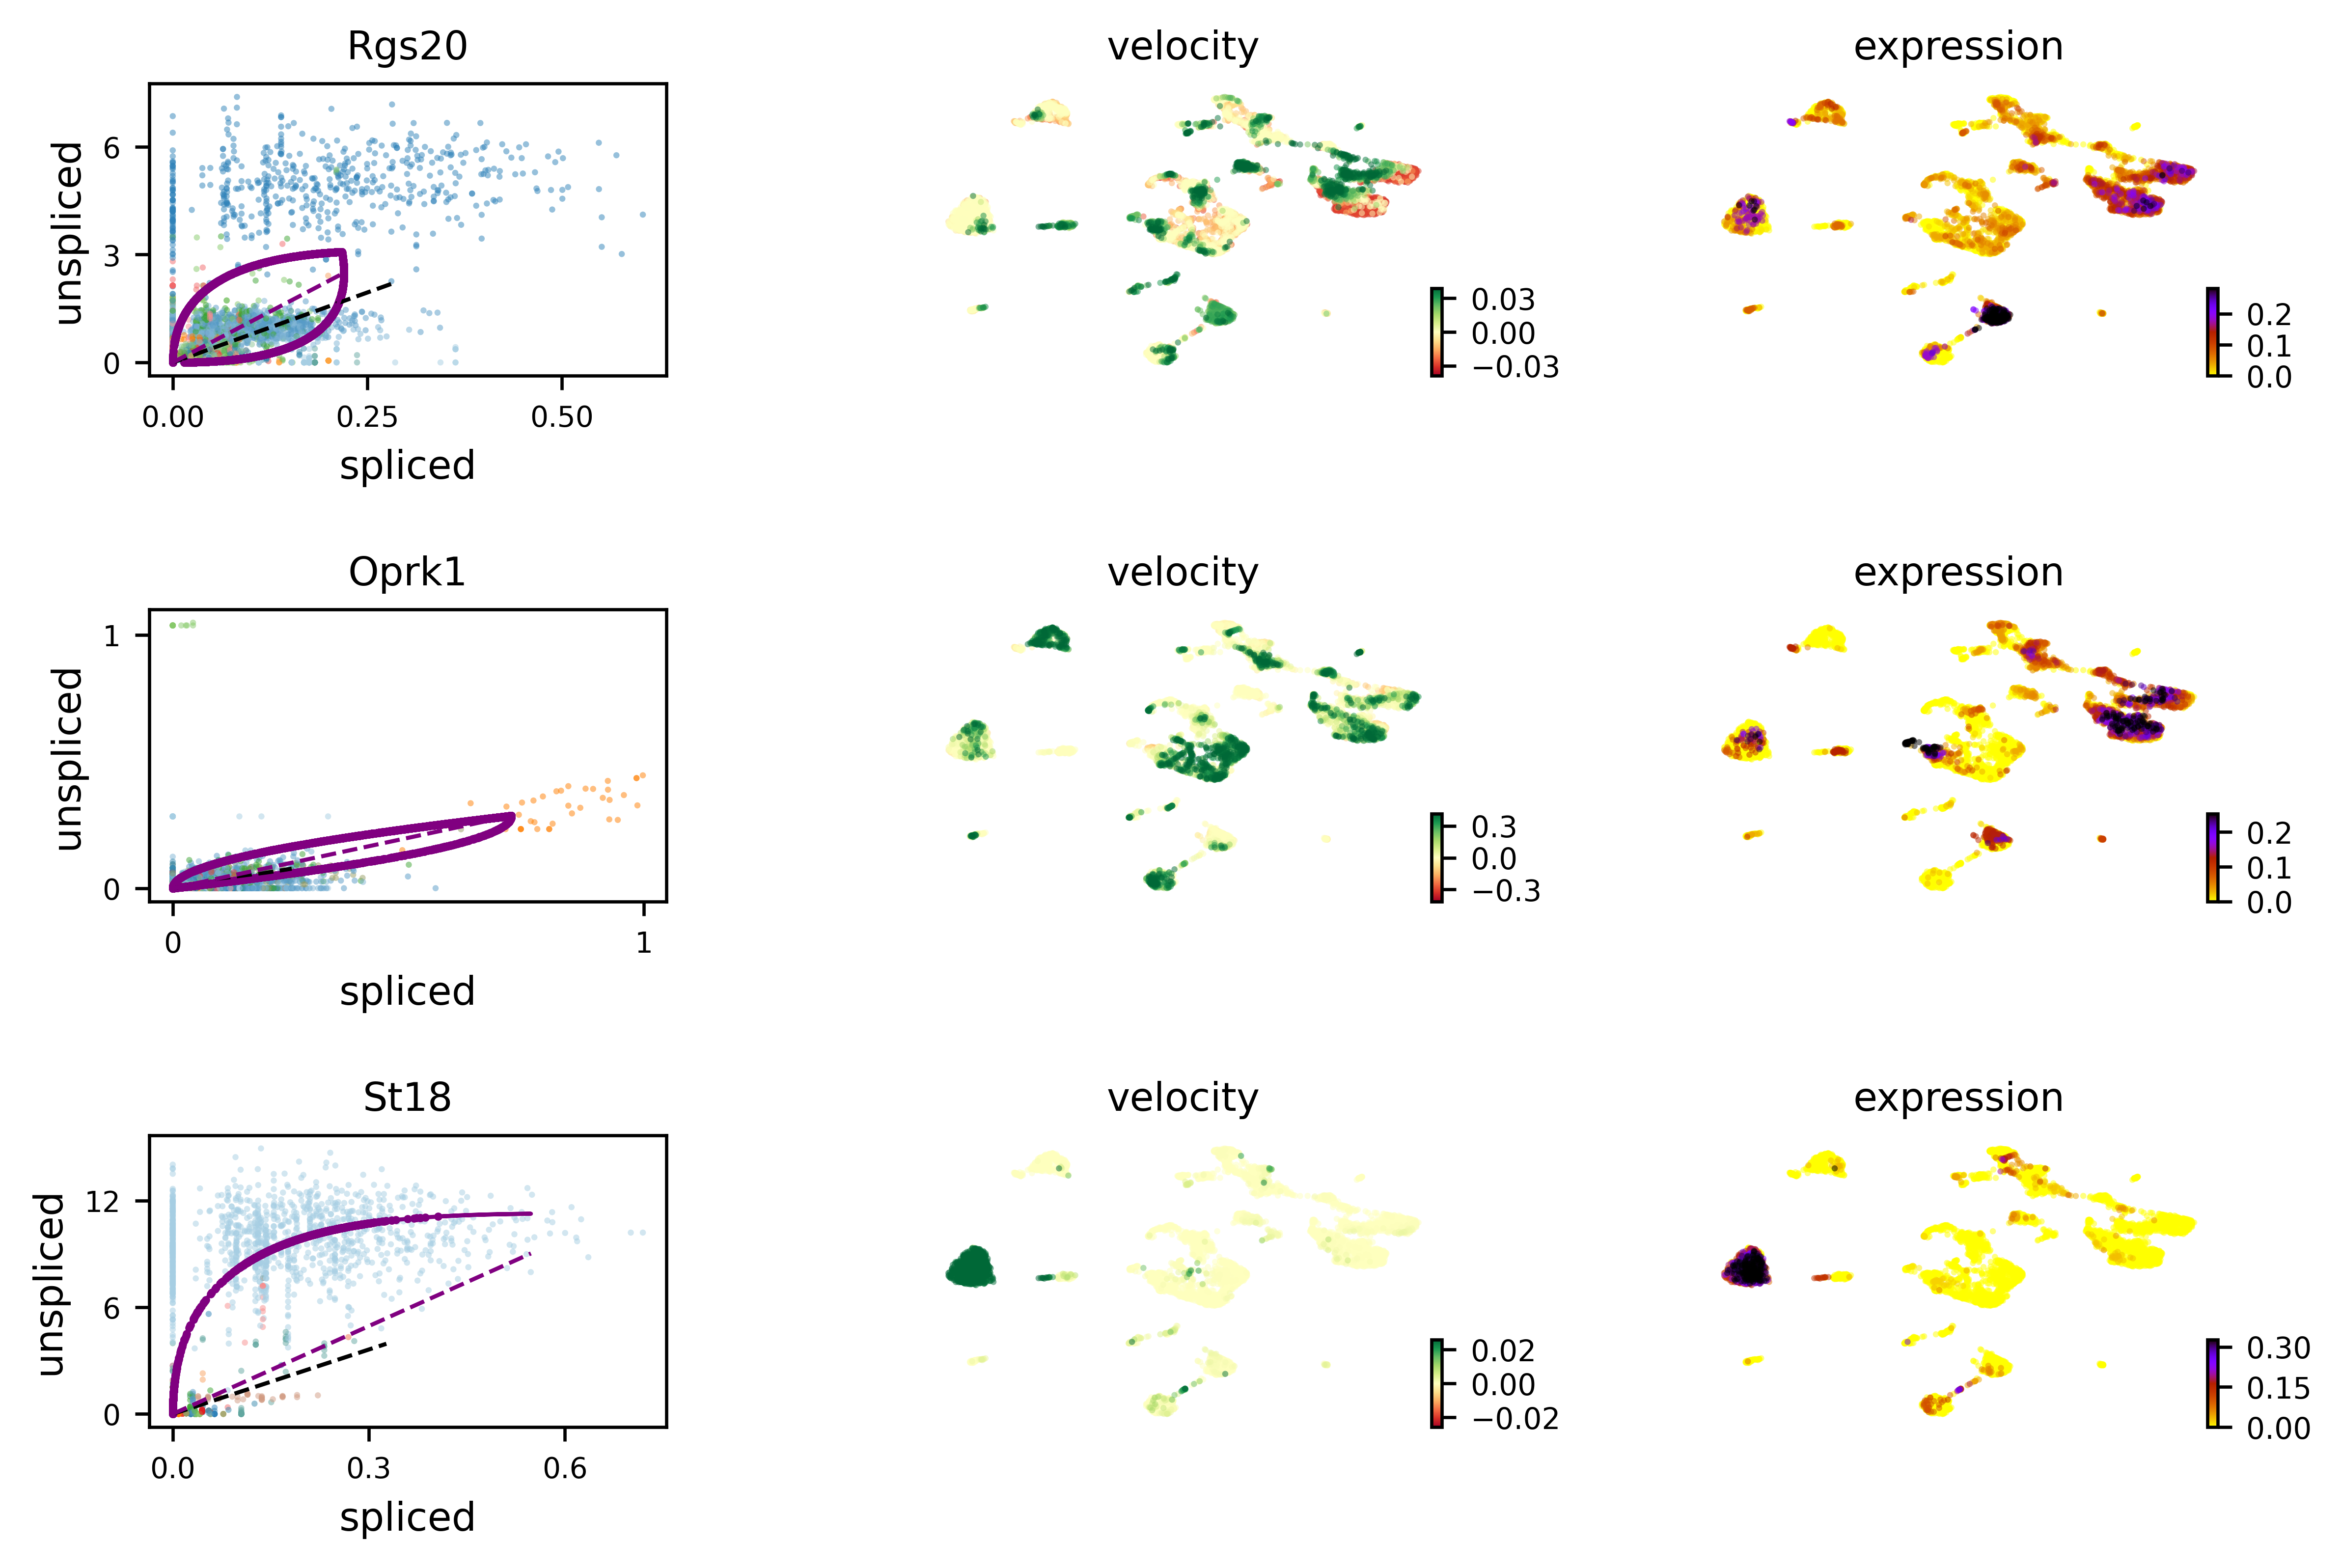

In [67]:
scv.pl.velocity(adata, ['Rgs20','Oprk1','St18'],color=['celltype'], ncols=1)